# Importing the libraries & dataset

In [27]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('/kaggle/input/crop-data/crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [30]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [31]:
df.size

17600

In [32]:
df.shape

(2200, 8)

In [33]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [34]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [35]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [36]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [37]:
df['temperature'].describe()

count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64

In [38]:
df['humidity'].describe()

count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: humidity, dtype: float64

In [39]:
df['ph'].describe()

count    2200.000000
mean        6.469480
std         0.773938
min         3.504752
25%         5.971693
50%         6.425045
75%         6.923643
max         9.935091
Name: ph, dtype: float64

In [40]:
df['rainfall'].describe()

count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64

# Data Visualization

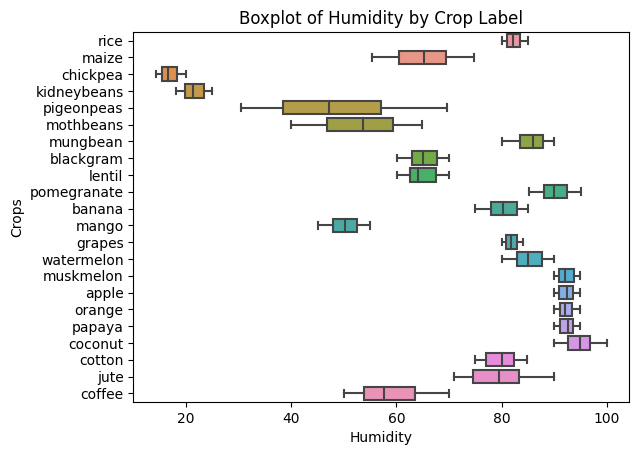

In [41]:
sns.boxplot(x='humidity',y='label',data=df)
plt.xlabel('Humidity')
plt.ylabel('Crops')
plt.title('Boxplot of Humidity by Crop Label')
plt.show()
# box plot

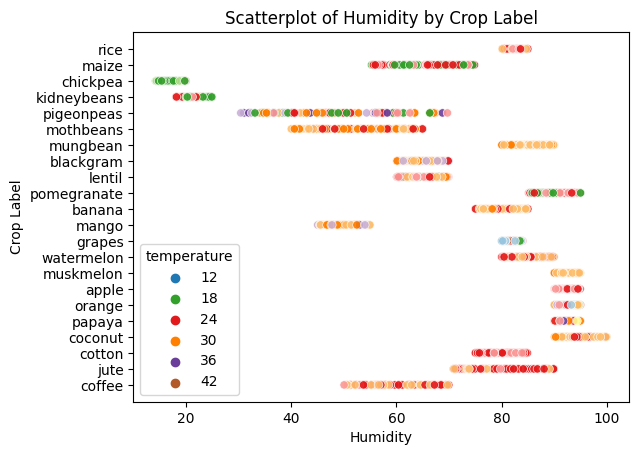

In [42]:
color_palette=sns.color_palette('Paired', as_cmap=True)
sns.scatterplot(x='humidity',y='label',hue='temperature',alpha=0.9,palette=color_palette,data=df)
plt.xlabel('Humidity')
plt.ylabel('Crop Label')
plt.title('Scatterplot of Humidity by Crop Label')
plt.show()
# scatter plot

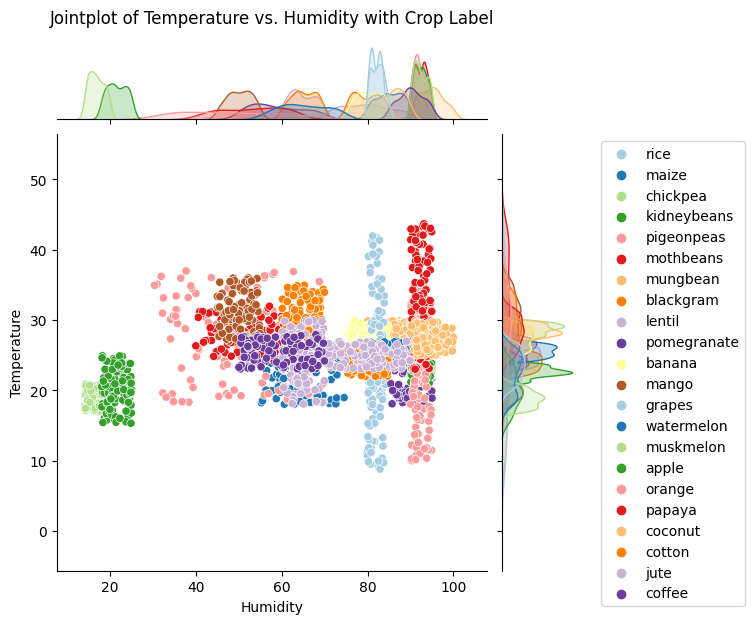

In [44]:
sns.jointplot(x='humidity', y='temperature', hue='label', palette='Paired', data=df)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Jointplot of Temperature vs. Humidity with Crop Label', loc='center', pad=80)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left')
plt.show()

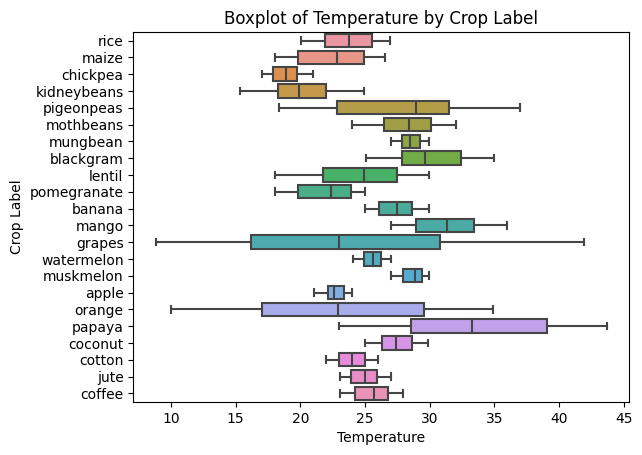

In [45]:
sns.boxplot(x='temperature',y='label',data=df)
plt.xlabel('Temperature')
plt.ylabel('Crop Label')
plt.title('Boxplot of Temperature by Crop Label')
plt.show()
# box plot

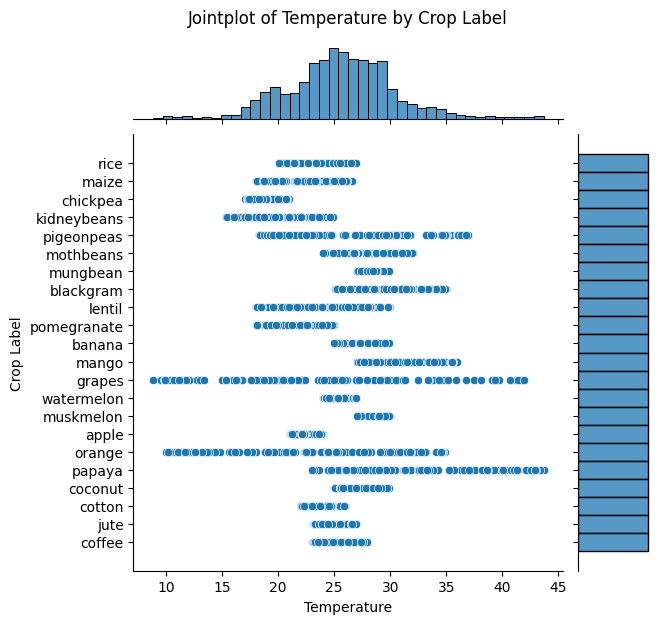

In [46]:
sns.jointplot(x='temperature', y='label', data=df)
plt.xlabel('Temperature')
plt.ylabel('Crop Label')
plt.title('Jointplot of Temperature by Crop Label', loc='center', pad=80)
plt.show()

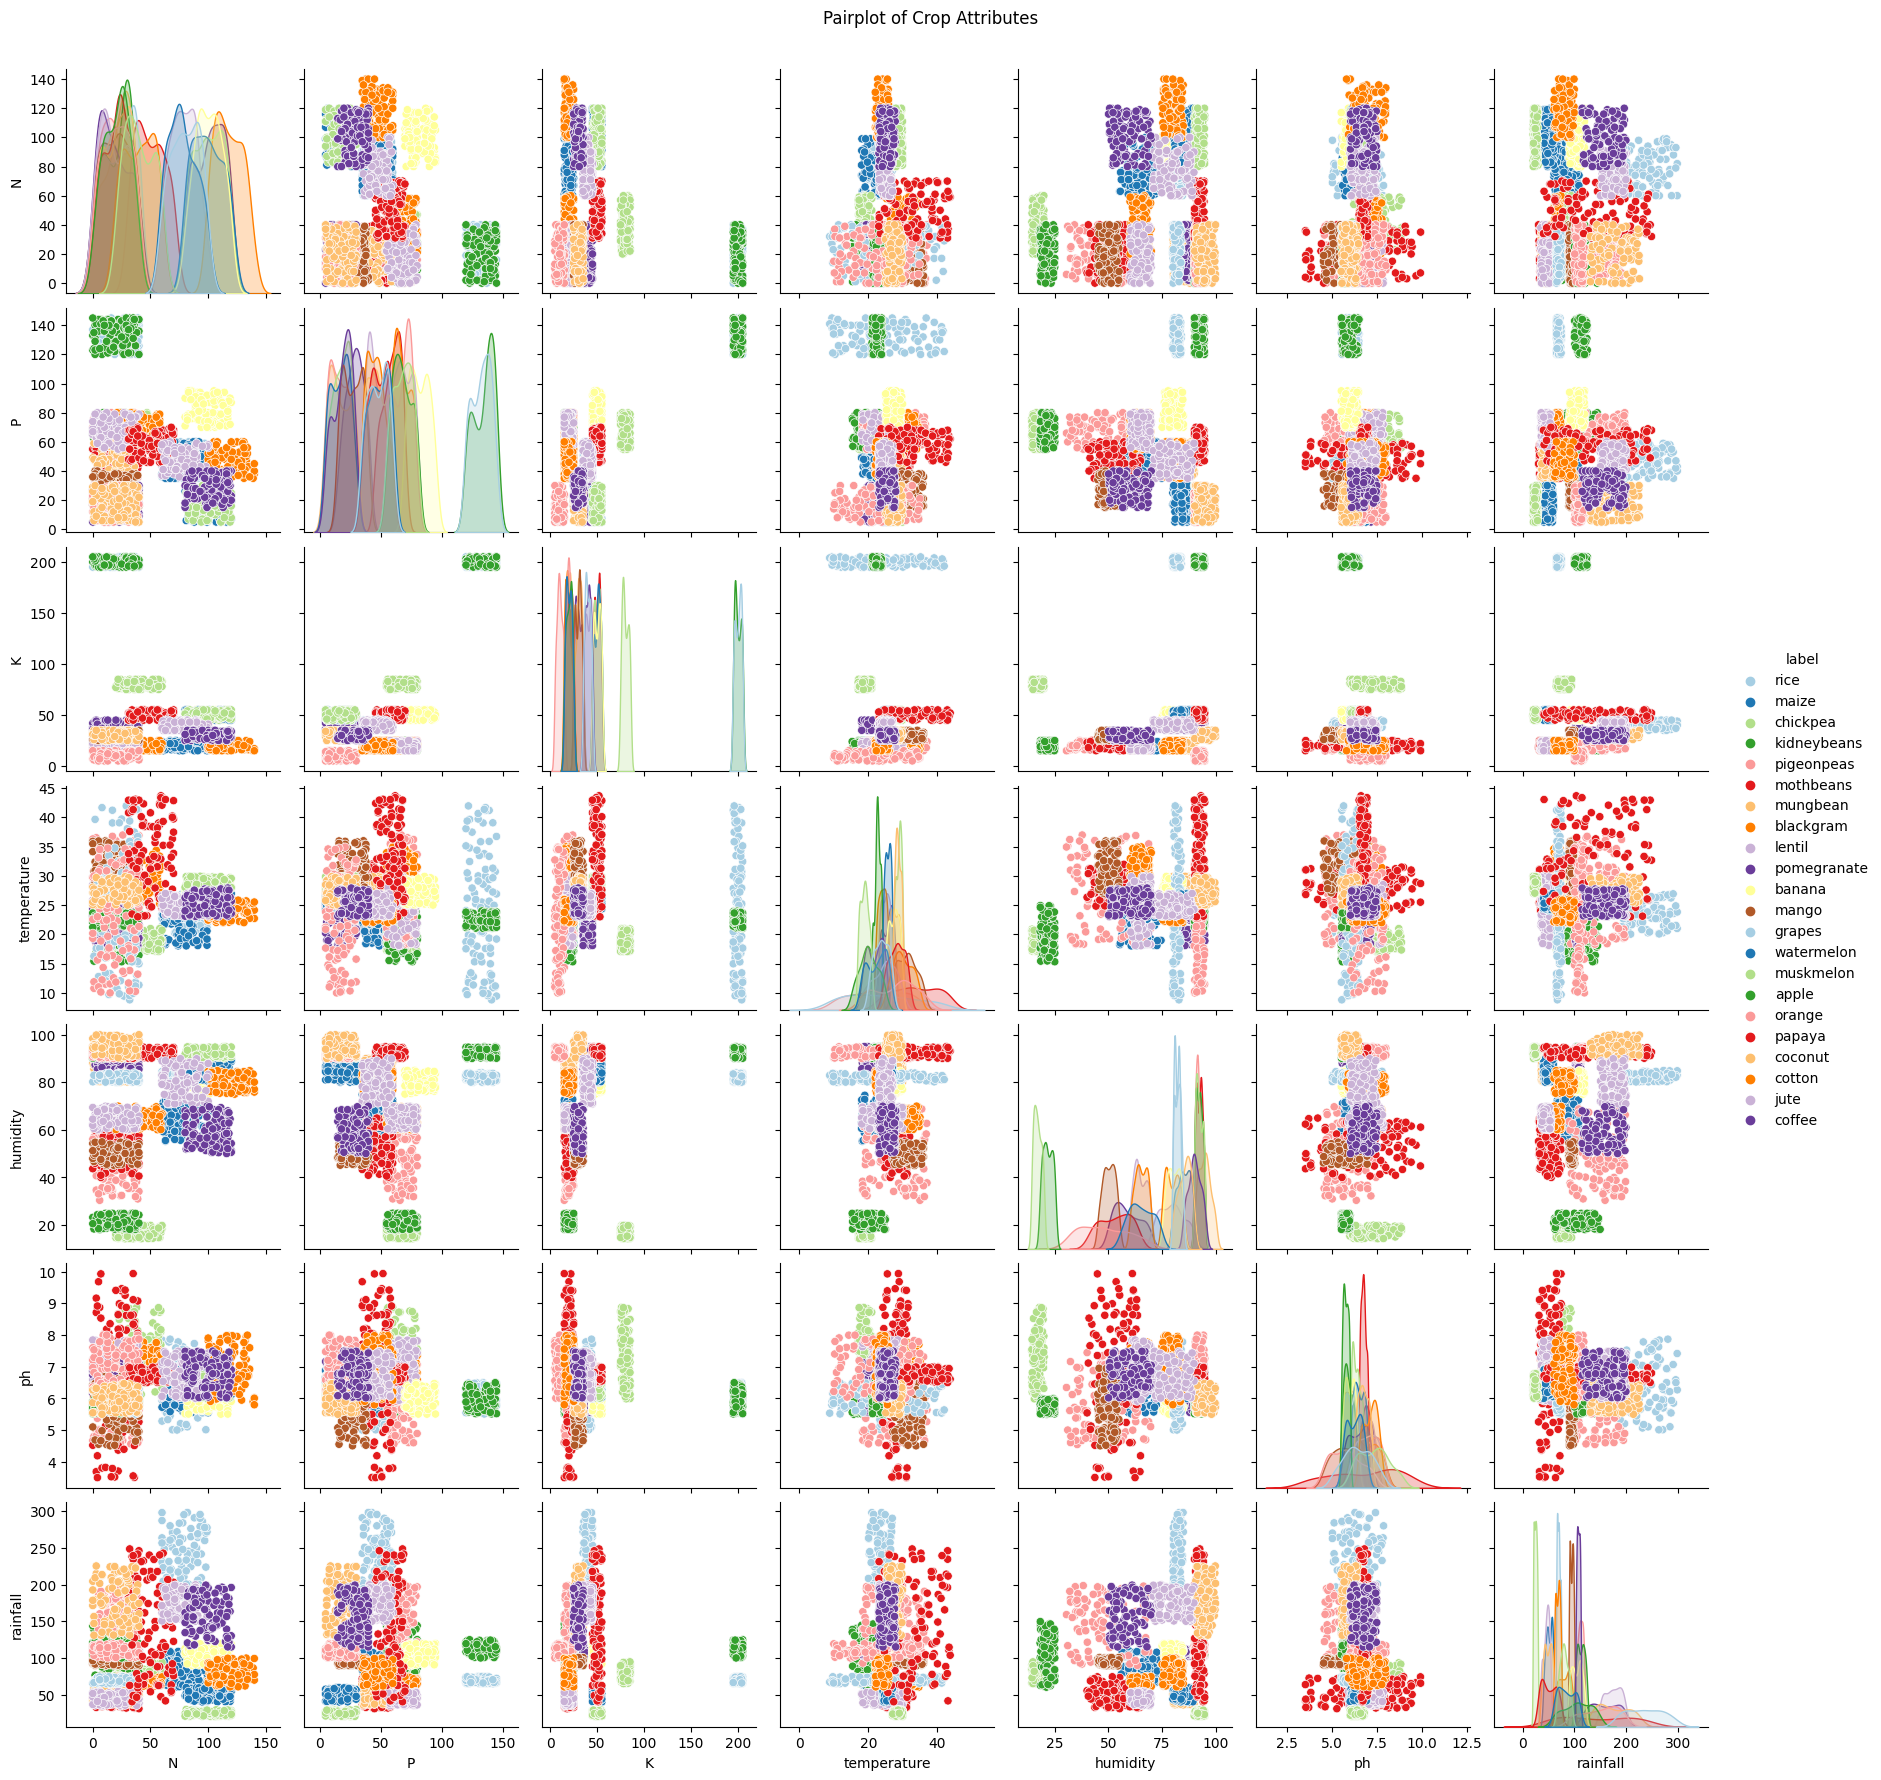

In [47]:
sns.pairplot(df, hue='label', palette='Paired')
plt.suptitle('Pairplot of Crop Attributes', y=1.02)
plt.show()

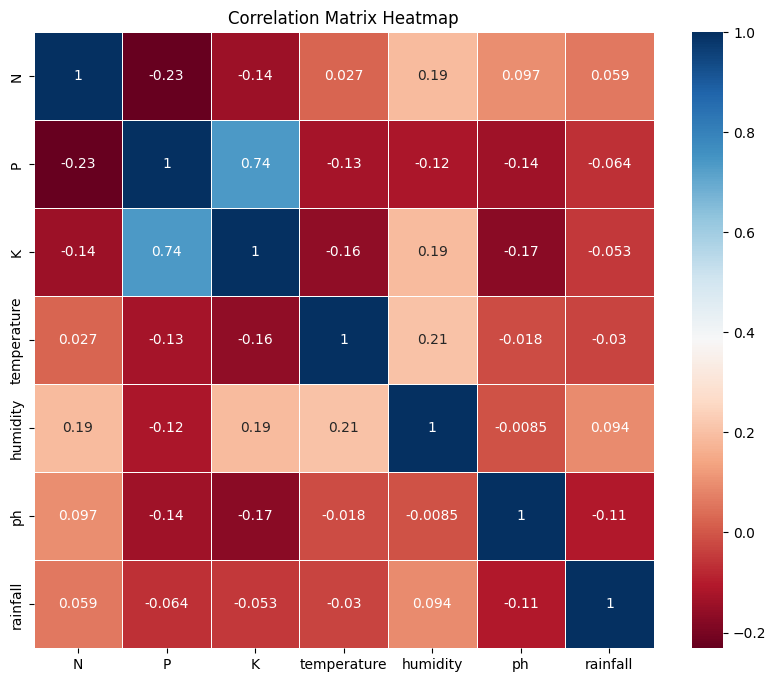

In [48]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Seperating features and target label


In [50]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [51]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [52]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

> # Classification Machine Learning models

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.65      1.00      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       0.94      1.00      0.97        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.50      0.03      0.06        33
 kidneybeans       0.00      0.00      0.00        30
      lentil       0.63      1.00      0.77        32
       maize       0.97      1.00      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [56]:
import joblib
DT_pkl_filename = 'DecisionTree.pkl'
joblib.dump(DecisionTree, DT_pkl_filename)

['DecisionTree.pkl']

## Guassian Naive Bayes


In [57]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [58]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [59]:
import joblib
NB_pkl_filename = 'NBClassifier.pkl'
joblib.dump(NaiveBayes, NB_pkl_filename)

['NBClassifier.pkl']

## Support Vector Machine (SVM)


In [60]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)

SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9833333333333333
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      0.97      0.98        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.85      0.88      0.87        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.97      1.00      0.98        32
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [61]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [62]:
import joblib
SVM_pkl_filename = 'SVMClassifier.pkl'
joblib.dump(SVM, SVM_pkl_filename)

['SVMClassifier.pkl']

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=100)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9621212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.82      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.91      0.94      0.92        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.94      0.90        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.96        32
       maize       0.94      0.91      0.92        32
       mango       0.97      1.00      0.99        33
   mothbeans       0.83      0.83      0.83        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00   

In [64]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [66]:
import joblib
LR_pkl_filename = 'LogisticRegression.pkl'
joblib.dump(LogReg, LR_pkl_filename)

['LogisticRegression.pkl']

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.94      0.91        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [68]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [70]:
import joblib
RF_pkl_filename = 'RandomForest.pkl'
joblib.dump(RF, RF_pkl_filename)

['RandomForest.pkl']

## AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')


In [72]:
adb = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1, random_state=0)

adb.fit(Xtrain, Ytrain)

predicted_values = adb.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('ADB')
print("ADB's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

ADB's Accuracy is:  0.953030303030303
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      0.94      0.97        31
      coffee       1.00      0.97      0.98        33
      cotton       0.94      0.97      0.95        31
      grapes       1.00      1.00      1.00        29
        jute       0.71      0.91      0.80        33
 kidneybeans       1.00      0.93      0.97        30
      lentil       0.82      1.00      0.90        32
       maize       0.97      0.94      0.95        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.76      0.86        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [73]:
# Cross validation score (AdaBoost)
score = cross_val_score(adb,features,target,cv=5)
score

array([0.95227273, 0.97272727, 0.96136364, 0.95      , 0.95681818])

In [74]:
import joblib
ADB_pkl_filename = 'AdaBoost.pkl'
joblib.dump(adb, ADB_pkl_filename)

['AdaBoost.pkl']

> # Regression Machine Learning models

## Support Vector Regressor (SVR)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Feature matrix
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(df['label'])

# Splitting into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=2)

#Initializing empty lists for Regression Models, as accuracy score is not valid for those
MSE = []
RMSE = []
MAE = []
R2 = []

reg_model = []

In [76]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', degree=3, gamma='scale')

svr.fit(X_train, Y_train)

predicted_values = svr.predict(X_test)

mse = mean_squared_error(Y_test, predicted_values)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(Y_test, predicted_values, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, predicted_values)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, predicted_values)
print("R-squared score:", r2)

MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R2.append(r2)

reg_model.append('SVR')

Mean Squared Error: 10.951161786211426
Root Mean Squared Error: 3.3092539621811174
Mean Absolute Error: 2.197777404896077
R-squared score: 0.7074749588347472


In [77]:
# Cross validation score (SVR)
score = cross_val_score(svr,features,target_encoded,cv=5)
score

array([ 0.05191696, -0.10930825,  0.34831983,  0.51971694, -7.33710188])

In [78]:
import joblib
SVR_pkl_filename = 'SVRegressor.pkl'
joblib.dump(svr, SVR_pkl_filename)

['SVRegressor.pkl']

## Gradient Boosting Regression

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, n_estimators=300, max_depth=1)

gbr.fit(X_train, Y_train)

predicted_values = gbr.predict(X_test)

mse = mean_squared_error(Y_test, predicted_values)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(Y_test, predicted_values, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, predicted_values)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, predicted_values)
print("R-squared score:", r2)

MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R2.append(r2)

reg_model.append('Gradient Boosting Regressor')

Mean Squared Error: 25.813832965971145
Root Mean Squared Error: 5.080731538466793
Mean Absolute Error: 3.8931830531089906
R-squared score: 0.31046653328495677


In [80]:
# Cross validation score (SVR)
score = cross_val_score(gbr,features,target_encoded,cv=5)
score

array([-0.46264569,  0.06528797, -0.02333974, -0.03443455, -9.2948745 ])

In [81]:
import joblib
GBR_pkl_filename = 'GradientBoostingRegressor.pkl'
joblib.dump(gbr,GBR_pkl_filename)

['GradientBoostingRegressor.pkl']

## Extreme Gradient Boosting Regression

In [82]:
import xgboost as xgb

xgb_train = xgb.DMatrix(X_train, Y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, Y_test, enable_categorical=True)

n = 50
params = {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.1}

xgbmodel = xgb.train(params=params, dtrain=xgb_train, num_boost_round=n)

predicted_values = xgbmodel.predict(xgb_test)
predicted_values = predicted_values.astype(int)

mse = mean_squared_error(Y_test, predicted_values)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(Y_test, predicted_values, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, predicted_values)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, predicted_values)
print("R-squared score:", r2)

MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R2.append(r2)

reg_model.append('XGradient Boosting')

Mean Squared Error: 5.825757575757576
Root Mean Squared Error: 2.4136606173523187
Mean Absolute Error: 1.6893939393939394
R-squared score: 0.8443836363724444


In [83]:
import joblib
XGB_pkl_filename = 'XGradientBoosting.pkl'
joblib.dump(model,XGB_pkl_filename)

['XGradientBoosting.pkl']

## Random Forest Regression

In [84]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X_train, Y_train)

predicted_values = regressor.predict(X_test)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

mse = mean_squared_error(Y_test, predicted_values)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(Y_test, predicted_values, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, predicted_values)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, predicted_values)
print("R-squared score:", r2)

MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R2.append(r2)

reg_model.append('Random Forest Regressor')

Out-of-Bag Score: 0.9056987022945154
Mean Squared Error: 1.2117121212121211
Root Mean Squared Error: 1.100777961812518
Mean Absolute Error: 0.341060606060606
R-squared score: 0.9676330105373563


In [85]:
# Cross validation score (SVR)
score = cross_val_score(regressor,features,target_encoded,cv=5)
score

array([-0.84010311, -0.32530543, -0.35156642,  0.04174472, -7.11376614])

In [86]:
import joblib
RFR_pkl_filename = 'RandomForestReg.pkl'
joblib.dump(model,RFR_pkl_filename)

['RandomForestReg.pkl']

> # Ensemble Models

## Naive Forest --> Random Forest + Naive Bayes

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


RF = RandomForestClassifier(n_estimators=20, random_state=0)
NaiveBayes = GaussianNB()

NVF = VotingClassifier(estimators=[('rf', RF), ('gnb', NaiveBayes)], voting='hard')

In [88]:
NVF.fit(Xtrain,Ytrain)

predicted_values = NVF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Forest Ensemble')
print("Naive Forest's Accuracy is: ", x)

Naive Forest's Accuracy is:  0.990909090909091


In [89]:
# Cross validation score (Naive Forest)
score = cross_val_score(NVF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99318182, 0.98863636])

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest,predicted_values)

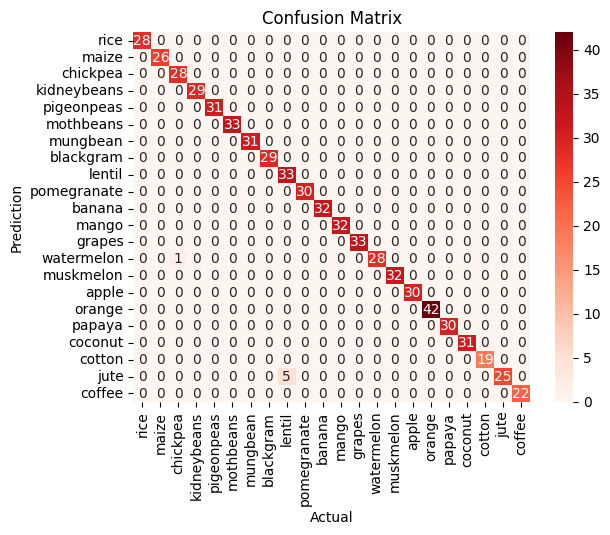

In [91]:
crop = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
sns.heatmap(cm, annot=True, fmt='g', yticklabels = crop, xticklabels = crop, cmap="Reds")
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Ytest, predicted_values)
print(accuracy)

0.990909090909091


In [93]:
import joblib
NVF_pkl_filename = 'Ensemble_NaiveForest.pkl'
joblib.dump(NVF, NVF_pkl_filename)

['Ensemble_NaiveForest.pkl']

## AdaForest --> Random Forest + AdaBoost

In [94]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Initialize base classifiers
random_forest = RandomForestClassifier(n_estimators=20, random_state=0)
adaboost = AdaBoostClassifier(base_estimator=random_forest, n_estimators=50, learning_rate=0.5)

# Initialize VotingClassifier
AdRf = VotingClassifier(estimators=[('rf', random_forest), ('adaboost', adaboost)], voting='hard')

# Train the ensemble model
AdRf.fit(Xtrain, Ytrain)

predicted_values = AdRf.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('AdaForest Ensemble')
print("AdaForest's Accuracy:", x)

AdaForest's Accuracy: 0.9924242424242424


In [95]:
# Cross validation score (Naive Forest)
score = cross_val_score(AdRf,features,target,cv=10)
score

array([0.99545455, 0.99545455, 1.        , 0.99090909, 0.99545455,
       0.99545455, 0.99545455, 0.99545455, 0.98636364, 0.99090909])

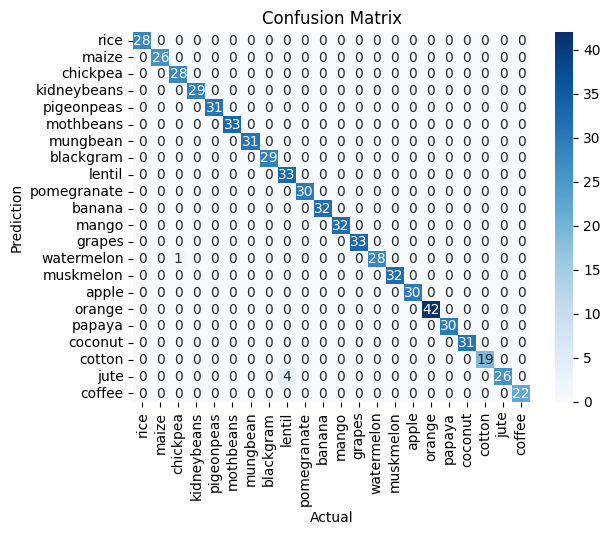

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest,predicted_values)

crop = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
sns.heatmap(cm, annot=True, fmt='g', yticklabels = crop, xticklabels = crop, cmap="Blues")
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
import joblib
ADRF_pkl_filename = 'Ensemble_AdaForest.pkl'
joblib.dump(AdRf, ADRF_pkl_filename)

['Ensemble_AdaForest.pkl']

## AdaBayes --> Naive Bayes + AdaBoost

In [98]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Initialize base classifiers
NaiveBayes = GaussianNB()
adaboost = AdaBoostClassifier(base_estimator=NaiveBayes, n_estimators=50, learning_rate=0.5)

# Initialize VotingClassifier
AdNb = VotingClassifier(estimators=[('gnb', NaiveBayes), ('adaboost', adaboost)], voting='hard')

# Train the ensemble model
AdNb.fit(Xtrain, Ytrain)

predicted_values = AdNb.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('AdaBayes Ensemble')
print("AdaBayes's Accuracy:", x)

AdaBayes's Accuracy: 0.9939393939393939


In [99]:
# Cross validation score (Naive Forest)
score = cross_val_score(AdNb,features,target,cv=10)
score

array([0.99545455, 0.99090909, 1.        , 0.98636364, 0.98636364,
       1.        , 0.99545455, 0.99090909, 0.98636364, 0.99545455])

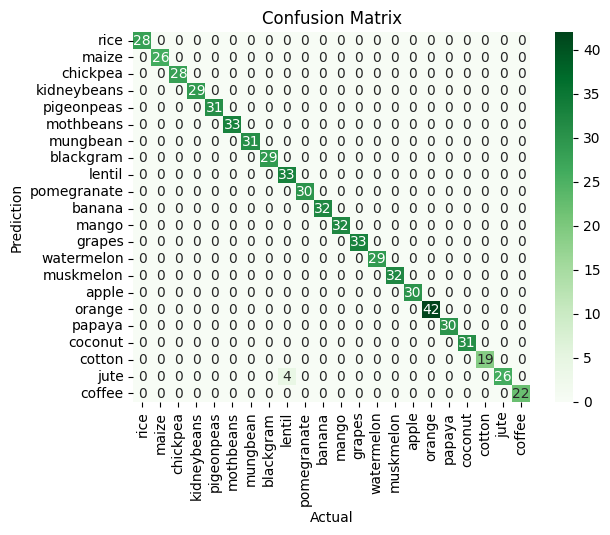

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest,predicted_values)

crop = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
sns.heatmap(cm, annot=True, fmt='g', yticklabels = crop, xticklabels = crop, cmap="Greens")
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
import joblib
ADNB_pkl_filename = 'Ensemble_AdaBayes.pkl'
joblib.dump(AdNb, ADNB_pkl_filename)

['Ensemble_AdaBayes.pkl']

> # Result Comparison

## Accuracy

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

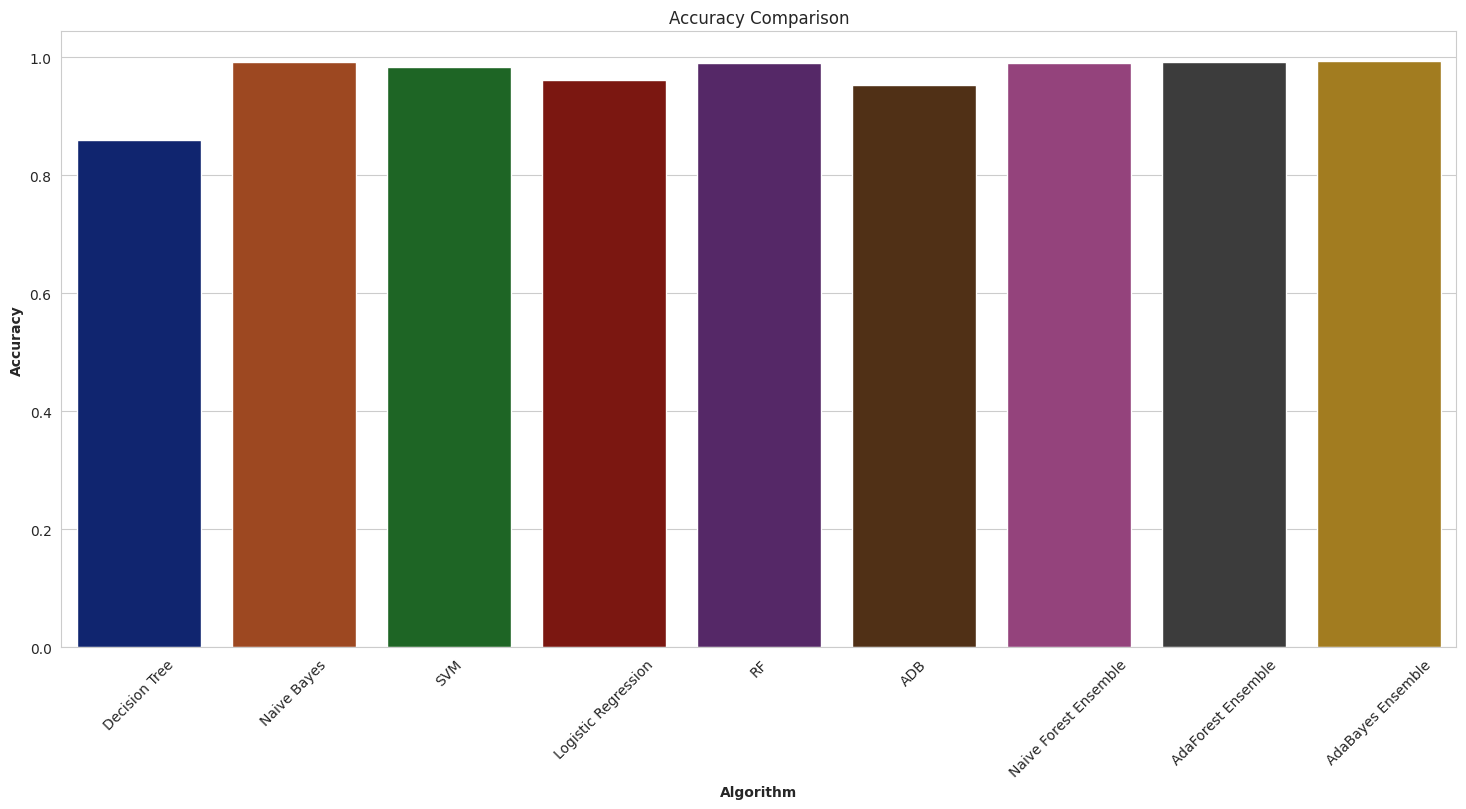

In [102]:
sns.set_style("whitegrid", {"grid.linewidth": 1.5, "grid.alpha": 1})

plt.figure(figsize=[18,8])
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks(rotation=45)

sns.barplot(x=model, y=acc, palette='dark')

In [103]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8590909090909091
Naive Bayes --> 0.9924242424242424
SVM --> 0.9833333333333333
Logistic Regression --> 0.9621212121212122
RF --> 0.9893939393939394
ADB --> 0.953030303030303
Naive Forest Ensemble --> 0.990909090909091
AdaForest Ensemble --> 0.9924242424242424
AdaBayes Ensemble --> 0.9939393939393939


## Errors

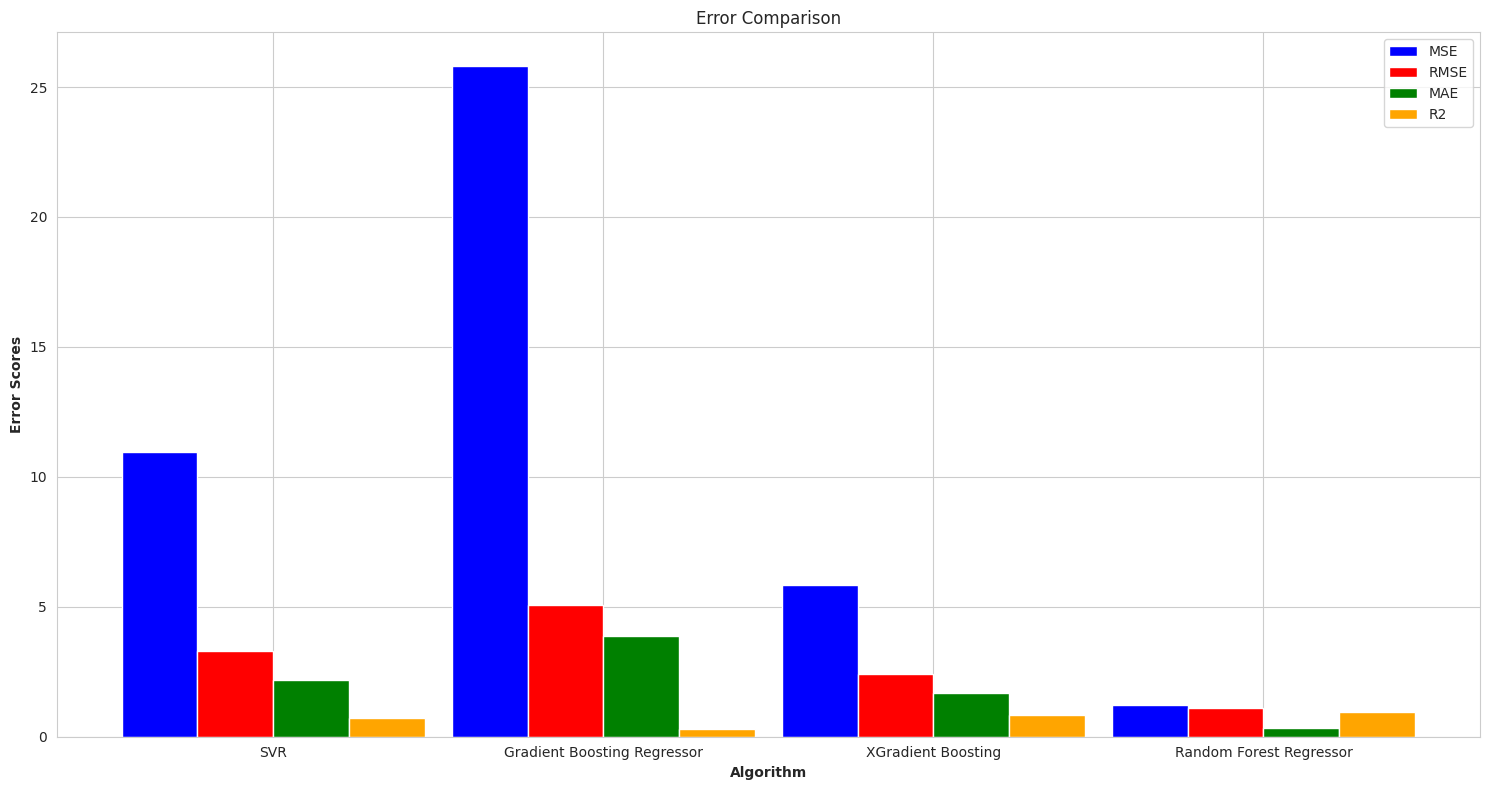

In [104]:
plt.figure(figsize=[15,8])
plt.title('Error Comparison')
plt.xlabel('Algorithm', fontweight='bold')
plt.ylabel('Error Scores', fontweight='bold')

bar_width = 0.23

r1 = np.arange(len(reg_model))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, MSE, color='blue', width=bar_width, label='MSE')
plt.bar(r2, RMSE, color='red',width=bar_width, label='RMSE')
plt.bar(r3, MAE, color='green',width=bar_width, label='MAE')
plt.bar(r4, R2, color='orange',width=bar_width, label='R2')

plt.xticks([r + bar_width * 1.5 for r in range(len(reg_model))], reg_model)

plt.grid(True, linestyle='-', linewidth=0.8, alpha=1)
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
# Create dictionaries for each error metric
MSE_dict = dict(zip(reg_model, MSE))
RMSE_dict = dict(zip(reg_model, RMSE))
MAE_dict = dict(zip(reg_model, MAE))
R2_dict = dict(zip(reg_model, R2))

# Print each error metric alongside the model names
for model_name in reg_model:
    print("Model:", model_name)
    print("MSE:", MSE_dict[model_name])
    print("RMSE:", RMSE_dict[model_name])
    print("MAE:", MAE_dict[model_name])
    print("R2:", R2_dict[model_name])
    print()

Model: SVR
MSE: 10.951161786211426
RMSE: 3.3092539621811174
MAE: 2.197777404896077
R2: 0.7074749588347472

Model: Gradient Boosting Regressor
MSE: 25.813832965971145
RMSE: 5.080731538466793
MAE: 3.8931830531089906
R2: 0.31046653328495677

Model: XGradient Boosting
MSE: 5.825757575757576
RMSE: 2.4136606173523187
MAE: 1.6893939393939394
R2: 0.8443836363724444

Model: Random Forest Regressor
MSE: 1.2117121212121211
RMSE: 1.100777961812518
MAE: 0.341060606060606
R2: 0.9676330105373563



# Making a prediction

In [106]:
data = np.array([[7.145727352, 26.97674094, 0, 23.94151756, 20.7764457, 7.214606726, 39.23231482]])
prediction = NVF.predict(data)
print(prediction)

['kidneybeans']


In [107]:
data = np.array([[6.77, 15.60, 10.12, 33.25937, 32.78, 7.03, 60.84]])
prediction = NVF.predict(data)
print(prediction)

['mothbeans']


In [108]:
data = np.array([[0, 13.87, 0, 19.63, 24.67, 7.55, 47.89]])
prediction = NVF.predict(data)
print(prediction)

['kidneybeans']


In [109]:
data = np.array([[60, 55, 44, 23, 82, 7.8, 264]])
prediction = NVF.predict(data)
print(prediction)

['rice']


In [110]:
data = np.array([[60, 55, 44, 23, 82, 7.8, 264]])
prediction = AdRf.predict(data)
print(prediction)

['rice']


In [111]:
data = np.array([[60, 55, 44, 23, 82, 7.8, 264]])
prediction = AdNb.predict(data)
print(prediction)

['rice']
